# Customer Churn Prediction

[Dataset](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction)

## Import packages

In [46]:
import pandas as pd
import kagglehub
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE


## Data Wrangling

### Download Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("ankitverma2010/ecommerce-customer-churn-analysis-and-prediction")

# Get the Excel file path from the directory
file_path = os.path.join(path, "E Commerce Dataset.xlsx")  # Assuming the Excel file is named "E Commerce Dataset.xlsx"

print("Path to dataset files:", file_path)

Path to dataset files: /kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx


### Load Data

In [3]:
excel_sheets = pd.ExcelFile(file_path)
excel_sheets.sheet_names

['Data Dict', 'E Comm']

In [4]:
df = excel_sheets.parse(excel_sheets.sheet_names[1])
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
excel_sheets.parse(excel_sheets.sheet_names[0]).head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,E Comm,CustomerID,Unique customer ID
2,NaN,E Comm,Churn,Churn Flag
3,NaN,E Comm,Tenure,Tenure of customer in organization
4,NaN,E Comm,PreferredLoginDevice,Preferred login device of customer


### EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [8]:
df.dtypes

,0
CustomerID,int64
Churn,int64
Tenure,float64
PreferredLoginDevice,object
CityTier,int64
WarehouseToHome,float64
PreferredPaymentMode,object
Gender,object
HourSpendOnApp,float64
NumberOfDeviceRegistered,int64


In [9]:
df.isna().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


### Fill in empty values

In [10]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mean())

In [11]:
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].mean())

In [12]:
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean())

In [13]:
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].mean())

In [14]:
df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].mean())

In [15]:
df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].mean())

In [16]:
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].mean())

In [17]:
df.isna().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


### Convert stings(object) to categorical variables

We want to convert the string values in the table into numerical format

In [18]:
df.dtypes

,0
CustomerID,int64
Churn,int64
Tenure,float64
PreferredLoginDevice,object
CityTier,int64
WarehouseToHome,float64
PreferredPaymentMode,object
Gender,object
HourSpendOnApp,float64
NumberOfDeviceRegistered,int64


#### One-Hot encoding

In [19]:
df = pd.get_dummies(columns=['Gender'], data=df, drop_first=True)

In [20]:
df = pd.get_dummies(columns=['PreferredLoginDevice'], data=df)

In [21]:
df = pd.get_dummies(columns=['PreferredPaymentMode'], data=df)

In [22]:
df = pd.get_dummies(columns=['PreferedOrderCat'], data=df)

In [23]:
df = pd.get_dummies(columns=['MaritalStatus'], data=df)

In [24]:
df.dtypes

,0
CustomerID,int64
Churn,int64
Tenure,float64
CityTier,int64
WarehouseToHome,float64
HourSpendOnApp,float64
NumberOfDeviceRegistered,int64
SatisfactionScore,int64
NumberOfAddress,int64
Complain,int64


### Drop columns

In [25]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'Gender_Male', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [26]:
X = df[['Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'PreferredPaymentMode_CC',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others', 'Gender_Male']]
y = df['Churn']

In [27]:
X.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,Gender_Male
0,4.000000,3,6.0,3.000000,3,2,9,1,11.0,1.0,...,True,False,False,False,False,True,False,False,False,False
1,10.189899,1,8.0,3.000000,4,3,7,1,15.0,0.0,...,False,False,True,False,False,False,True,False,False,True
2,10.189899,1,30.0,2.000000,4,3,6,1,14.0,0.0,...,True,False,False,False,False,False,True,False,False,True
3,0.000000,3,15.0,2.000000,4,5,8,0,23.0,0.0,...,True,False,False,False,False,True,False,False,False,True
4,0.000000,1,12.0,2.931535,3,5,3,0,11.0,1.0,...,False,False,False,False,False,False,True,False,False,True


In [28]:
y.head()

,Churn
0,1
1,1
2,1
3,1
4,1


### Preprocess data for training

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Build and train model

### Logistic Regression

In [30]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
lr_preds = lr_model.predict(X_test)
lr_preds

array([1, 0, 0, ..., 1, 0, 0])

### Random Forest

In [40]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_preds

array([1, 0, 0, ..., 1, 0, 1])

### Random Forest Balanced

In [41]:
rf_balanced_model = RandomForestClassifier(class_weight='balanced')
rf_balanced_model.fit(X_train, y_train)
rf_balanced_model_preds = rf_balanced_model.predict(X_test)
rf_balanced_model_preds

array([1, 0, 0, ..., 1, 0, 1])

## Evaluate model accuracy

### LR

In [33]:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1414
           1       0.77      0.53      0.62       275

    accuracy                           0.90      1689
   macro avg       0.84      0.75      0.78      1689
weighted avg       0.89      0.90      0.89      1689



In [35]:
print(confusion_matrix(y_test, lr_preds))

[[1370   44]
 [ 130  145]]


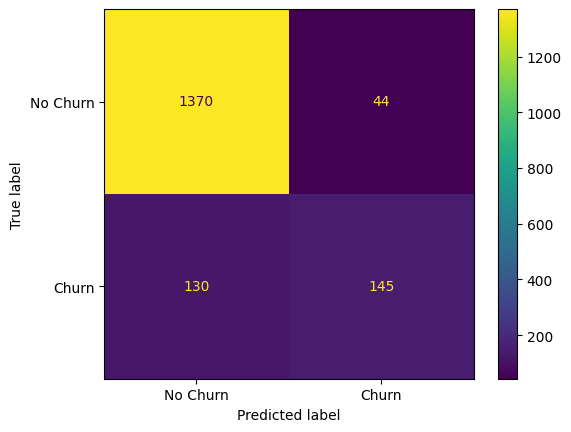

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, lr_preds, display_labels=["No Churn", "Churn"])


In [38]:
df.Churn.value_counts()

,count
Churn,
0,4682
1,948


### RF

In [42]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1414
           1       0.94      0.77      0.85       275

    accuracy                           0.95      1689
   macro avg       0.95      0.88      0.91      1689
weighted avg       0.95      0.95      0.95      1689



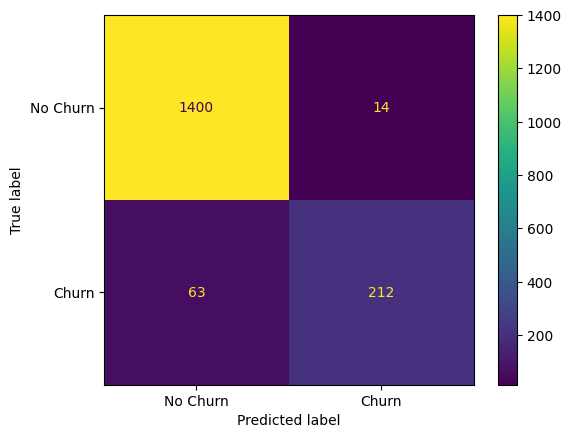

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, display_labels=["No Churn", "Churn"])


### RF balanced

In [44]:
print(classification_report(y_test, rf_balanced_model_preds))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1414
           1       0.96      0.74      0.83       275

    accuracy                           0.95      1689
   macro avg       0.95      0.87      0.90      1689
weighted avg       0.95      0.95      0.95      1689



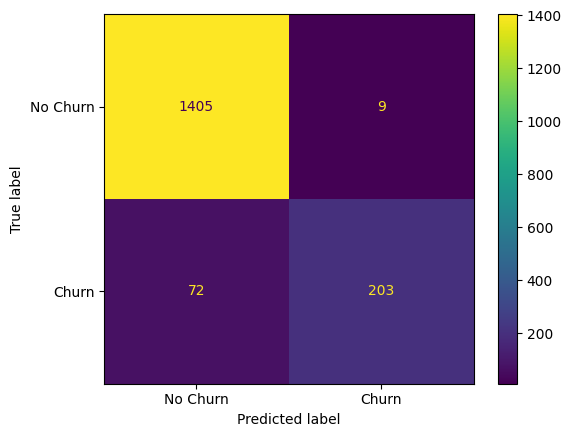

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_balanced_model_preds, display_labels=["No Churn", "Churn"])


## There is a big class imbalance, so we will try balancing the data and training the model again

In [47]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [49]:
# lr
lr_smote_model = LogisticRegression()
lr_smote_model.fit(X_res, y_res)
lr_smote_preds = lr_smote_model.predict(X_test)

# rf
rf_smote_model = RandomForestClassifier()
rf_smote_model.fit(X_res, y_res)
rf_smote_preds = rf_smote_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


since  we are susing smote, there is no need to create a separate random forest classifier and setting it to balanced.

In [50]:
print(classification_report(y_test, lr_smote_preds))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1414
           1       0.43      0.72      0.54       275

    accuracy                           0.80      1689
   macro avg       0.68      0.77      0.70      1689
weighted avg       0.85      0.80      0.82      1689



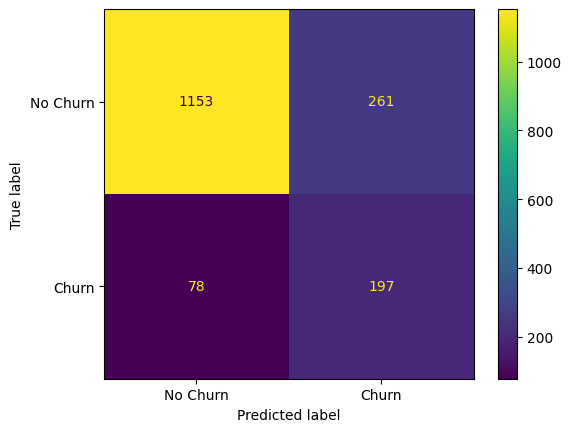

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, lr_smote_preds, display_labels=["No Churn", "Churn"])


In [53]:
print(classification_report(y_test, rf_smote_preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1414
           1       0.90      0.82      0.86       275

    accuracy                           0.96      1689
   macro avg       0.93      0.90      0.92      1689
weighted avg       0.96      0.96      0.96      1689



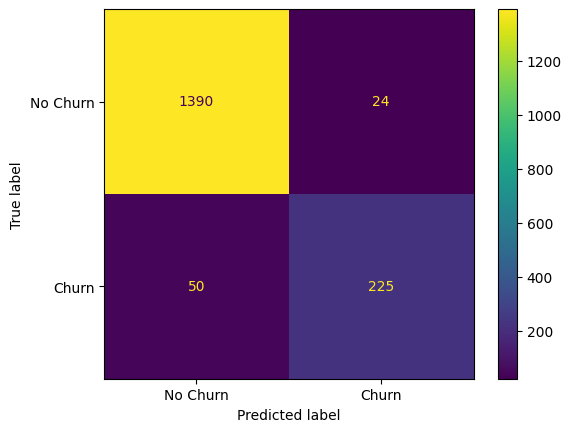

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_smote_preds, display_labels=["No Churn", "Churn"])
